In [1]:
library(dplyr)
library(tidyverse)

library(ggplot2)
library(cowplot)

library(readxl)

options(repr.plot.width=15, repr.plot.height=6)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.2     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




In [2]:
df <- read.csv("df_n_frutos_cum.csv")
head(df, 6)

,tratamento,bloco,colheita,n_frutos,n_frutos_cum,peso,comprimento,largura
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,1.5,1.5,309.0,62.33333,82.33333
2,1,1,2,6.5,8.0,1489.0,60.76923,77.23077
3,1,1,3,1.5,9.5,340.5,51.00000,79.00000
4,1,1,4,7.0,16.5,1288.0,54.64286,71.14286
5,1,1,5,10.0,26.5,2119.0,64.10000,77.00000
6,1,1,6,3.0,29.5,785.0,70.66667,85.00000


In [5]:
tratamentos = c(1,3,5,7,9,12,2,4,6,8,10,11)
blocos = c(1,2,3)

# slopes <- matrix(nrow = 10, ncol = 3) # Inclinações das retas
slopes_ <- c()
tratamentos_ <- c()
blocos_ <- c()
colheitas_ <- c()

for(i in tratamentos){
    for(j in blocos){
        df_trat <- df %>% filter(tratamento == i & bloco == j)
        fit <- lm(n_frutos_cum ~ colheita + 0, data = df_trat)
        
        tratamentos_ <- c(tratamentos_, i)
        blocos_ <- c(blocos_, j)
        slopes_ <- c(slopes_, fit$coefficients)
        colheitas_ <- c(colheitas_, ifelse(i != 12 & i %% 2 == 0 | i == 11, "alternada", "completa"))
    }
}

df_slopes <- data.frame(tratamento = factor(tratamentos_), bloco = factor(blocos_), slope = slopes_, colheita = factor(colheitas_))
head( df_slopes )

,tratamento,bloco,slope,colheita
,<fct>,<fct>,<dbl>,<fct>
1,1,1,4.632468,completa
2,1,2,2.781818,completa
3,1,3,3.636364,completa
4,3,1,4.172727,completa
5,3,2,3.889610,completa
6,3,3,3.498701,completa


In [4]:
fit <- lm(slope ~ tratamento + bloco, data = df_slopes)
s <- summary(fit)
s


Call:
lm(formula = slope ~ tratamento + bloco, data = df_slopes)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.29531 -0.31403  0.03521  0.35198  1.26486 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.36760    0.45742   7.362 2.28e-07 ***
tratamento2  -0.23333    0.59891  -0.390   0.7006    
tratamento3   0.17013    0.59891   0.284   0.7790    
tratamento4   0.87359    0.59891   1.459   0.1588    
tratamento5   0.36190    0.59891   0.604   0.5518    
tratamento6   0.67186    0.59891   1.122   0.2740    
tratamento7   0.07186    0.59891   0.120   0.9056    
tratamento8   0.84156    0.59891   1.405   0.1739    
tratamento9   0.32987    0.59891   0.551   0.5873    
tratamento10 -0.12814    0.59891  -0.214   0.8326    
tratamento11  0.56104    0.59891   0.937   0.3590    
tratamento12  0.40606    0.59891   0.678   0.5048    
bloco2        0.59275    0.29945   1.979   0.0604 .  
bloco3        0.35509    0.29945   1.186   0.2484    
---
S

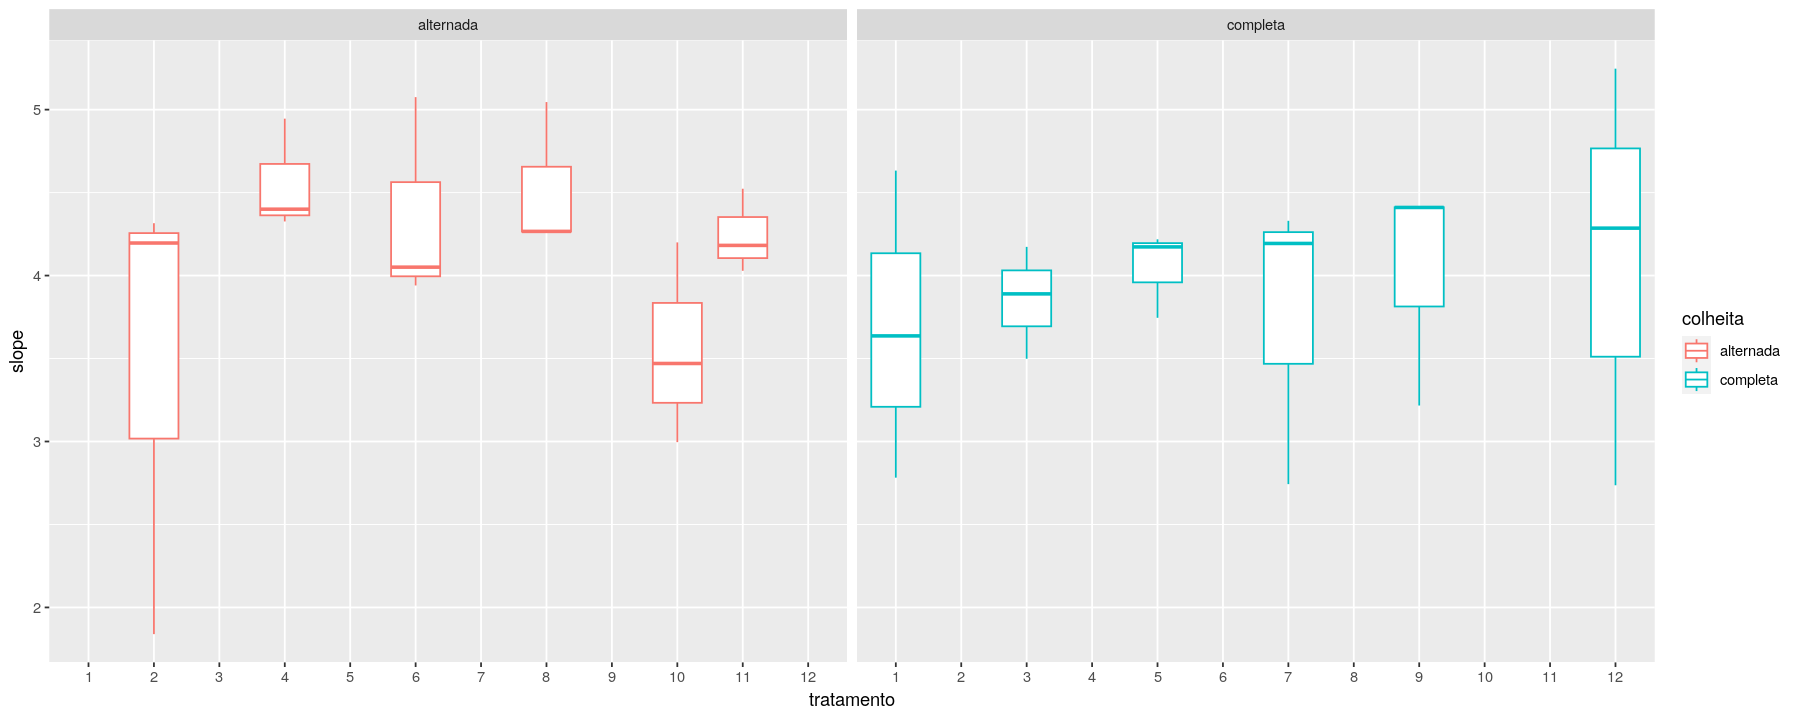

In [5]:
ggplot(df_slopes)+
    facet_grid(~colheita)+
    geom_boxplot(aes(x = tratamento, y = slope, color = colheita))

## ANOVA para cada tipo de colheita

#### Alternada

In [6]:
head(df_slopes)

,tratamento,bloco,slope,colheita
,<fct>,<fct>,<dbl>,<fct>
1,1,1,4.632468,completa
2,1,2,2.781818,completa
3,1,3,3.636364,completa
4,3,1,4.172727,completa
5,3,2,3.889610,completa
6,3,3,3.498701,completa


In [8]:
df_alternada <- df_slopes %>% filter(colheita == "alternada") %>% select(c(tratamento, bloco, slope))

df_alternada$tratamento <- factor(df_alternada$tratamento)
df_alternada$bloco <- factor(df_alternada$bloco)

In [9]:
model_alternada <- aov(slope ~ tratamento + bloco, data = df_alternada)
summary(model_alternada)

            Df Sum Sq Mean Sq F value Pr(>F)  
tratamento   5  3.580  0.7160   1.996 0.1649  
bloco        2  2.596  1.2981   3.618 0.0657 .
Residuals   10  3.588  0.3588                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Não sendo significativa a variável tratamento, não seria necessária a elaboração do teste de Tukey 2 a 2.

#### Completa

In [10]:
df_completa <- df_slopes %>% filter(colheita == "completa") %>% select(c(tratamento, bloco, slope))

df_completa$tratamento <- factor(df_completa$tratamento)
df_completa$bloco <- factor(df_completa$bloco)

In [11]:
model_completa <- aov(slope ~ tratamento + bloco, data = df_completa)
summary(model_completa)

            Df Sum Sq Mean Sq F value Pr(>F)
tratamento   5  0.419  0.0838   0.114  0.987
bloco        2  0.423  0.2113   0.287  0.757
Residuals   10  7.366  0.7366               

# Outono - Inverno

In [12]:
df <- read.csv("df_n_frutos_cum_oi.csv")
head(df, 6)

,tratamento,bloco,colheita,n_frutos,n_frutos_cum,peso,comprimento,largura
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,1.0,1.0,332.0,70.00000,91.50000
2,1,1,2,4.5,5.5,1666.5,72.00000,88.77778
3,1,1,3,0.5,6.0,113.0,64.00000,78.00000
4,1,1,4,6.5,12.5,1896.5,70.46154,85.84615
5,1,1,5,4.5,17.0,1126.0,66.88889,79.22222
6,1,2,1,0.0,0.0,0.0,0.00000,0.00000


In [13]:
tratamentos = c(1,3,5,7,9,12,2,4,6,8,10,11)
blocos = c(1,2,3)

# slopes <- matrix(nrow = 10, ncol = 3) # Inclinações das retas
slopes_ <- c()
tratamentos_ <- c()
blocos_ <- c()
colheitas_ <- c()

for(i in tratamentos){
    for(j in blocos){
        df_trat <- df %>% filter(tratamento == i & bloco == j)
        fit <- lm(n_frutos_cum ~ colheita + 0, data = df_trat)
        
        tratamentos_ <- c(tratamentos_, i)
        blocos_ <- c(blocos_, j)
        slopes_ <- c(slopes_, fit$coefficients)
        colheitas_ <- c(colheitas_, ifelse(i != 12 & i %% 2 == 0 | i == 11, "alternada", "completa"))
    }
}

head( data.frame(tratamento = tratamentos_, bloco = blocos_, slope = slopes_, colheita = colheitas_) )

,tratamento,bloco,slope,colheita
,<dbl>,<dbl>,<dbl>,<chr>
1,1,1,3.000000,completa
2,1,2,2.427273,completa
3,1,3,2.636364,completa
4,3,1,3.309091,completa
5,3,2,2.527273,completa
6,3,3,2.154545,completa


In [14]:
df_slopes <- data.frame(tratamento = factor(tratamentos_), bloco = factor(blocos_), slope = slopes_, colheita = factor(colheitas_))

fit <- lm(slope ~ tratamento + bloco, data = df_slopes)
s <- summary(fit)
s


Call:
lm(formula = slope ~ tratamento + bloco, data = df_slopes)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1331 -0.3022  0.0654  0.3646  0.5995 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.136e+00  3.395e-01   9.237 5.02e-09 ***
tratamento2   4.909e-01  4.446e-01   1.104  0.28141    
tratamento3  -2.424e-02  4.446e-01  -0.055  0.95700    
tratamento4  -5.364e-01  4.446e-01  -1.207  0.24043    
tratamento5   2.159e-15  4.446e-01   0.000  1.00000    
tratamento6   3.303e-01  4.446e-01   0.743  0.46534    
tratamento7  -3.030e-01  4.446e-01  -0.682  0.50257    
tratamento8   9.697e-02  4.446e-01   0.218  0.82934    
tratamento9   2.606e-01  4.446e-01   0.586  0.56369    
tratamento10 -1.727e-01  4.446e-01  -0.389  0.70135    
tratamento11  4.394e-01  4.446e-01   0.988  0.33371    
tratamento12 -1.879e-01  4.446e-01  -0.423  0.67667    
bloco2       -6.970e-01  2.223e-01  -3.136  0.00481 ** 
bloco3       -6.477e-01  2.223e-01  -2.91

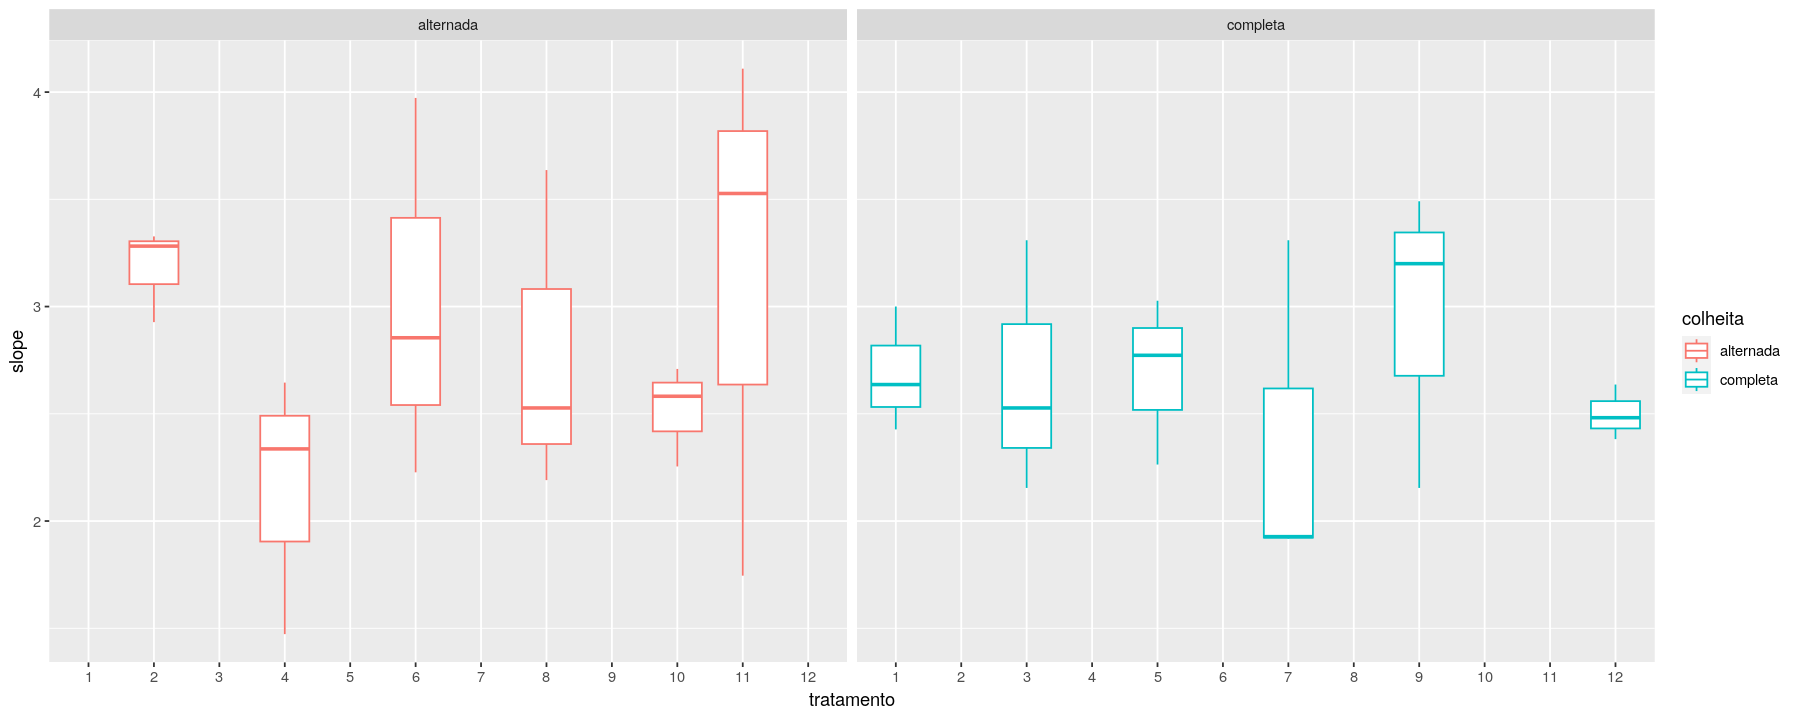

In [15]:
ggplot(df_slopes)+
    facet_grid(~colheita)+
    geom_boxplot(aes(x = tratamento, y = slope, color = colheita))

## ANOVA para cada tipo de colheita

#### Alternada

In [16]:
head(df_slopes)

,tratamento,bloco,slope,colheita
,<fct>,<fct>,<dbl>,<fct>
1,1,1,3.000000,completa
2,1,2,2.427273,completa
3,1,3,2.636364,completa
4,3,1,3.309091,completa
5,3,2,2.527273,completa
6,3,3,2.154545,completa


In [17]:
df_alternada <- df_slopes %>% filter(colheita == "alternada") %>% select(c(tratamento, bloco, slope))

df_alternada$tratamento <- factor(df_alternada$tratamento)
df_alternada$bloco <- factor(df_alternada$bloco)

In [18]:
model_alternada <- aov(slope ~ tratamento + bloco, data = df_alternada)
summary(model_alternada)

            Df Sum Sq Mean Sq F value Pr(>F)  
tratamento   5  2.400  0.4800   1.324 0.3292  
bloco        2  3.060  1.5300   4.220 0.0469 *
Residuals   10  3.626  0.3626                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Não sendo significativa a variável tratamento, não seria necessária a elaboração do teste de Tukey 2 a 2.

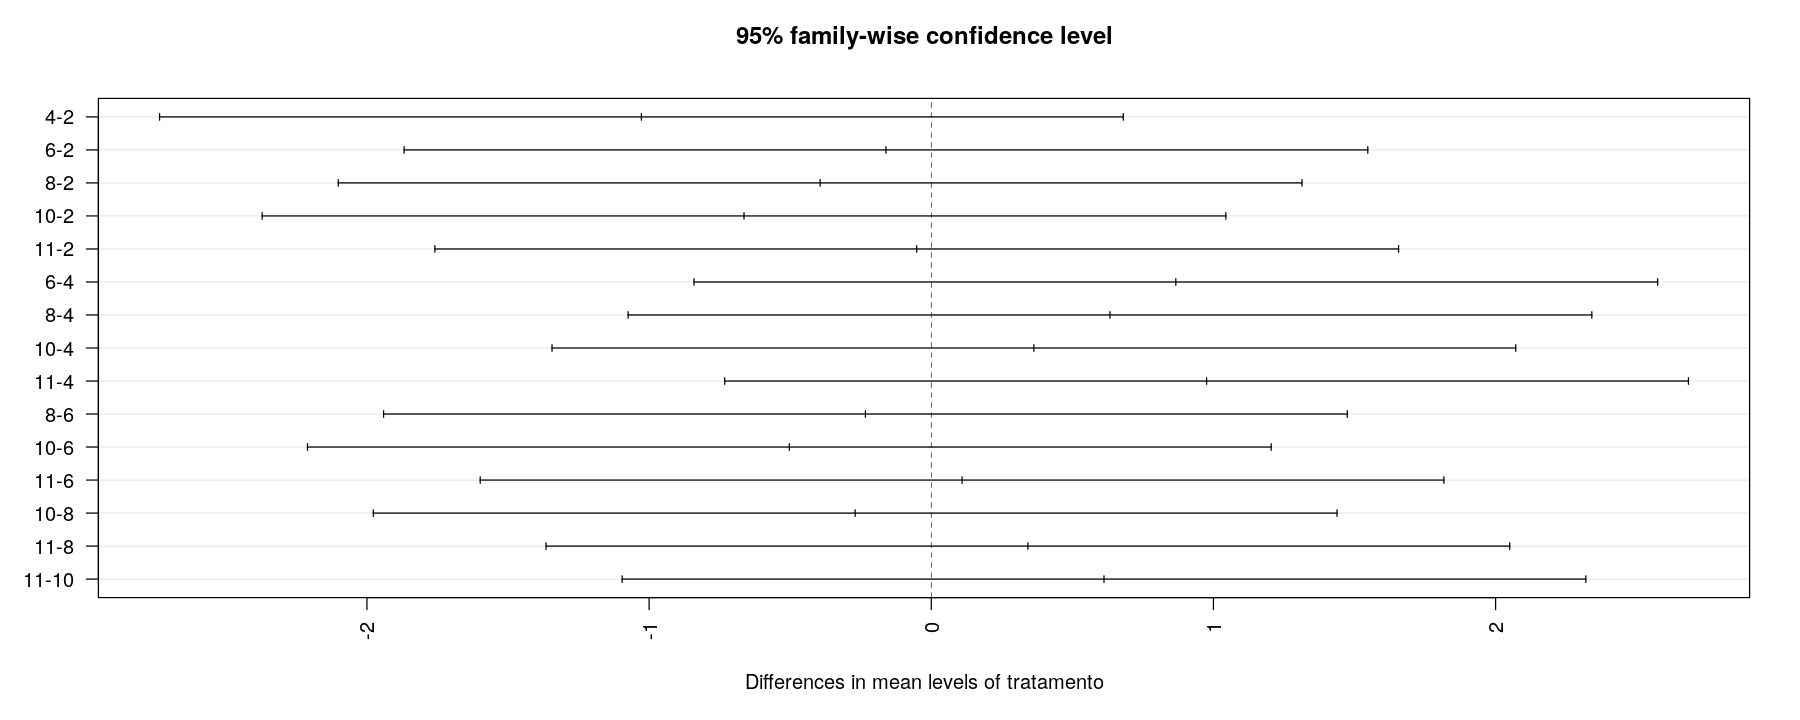

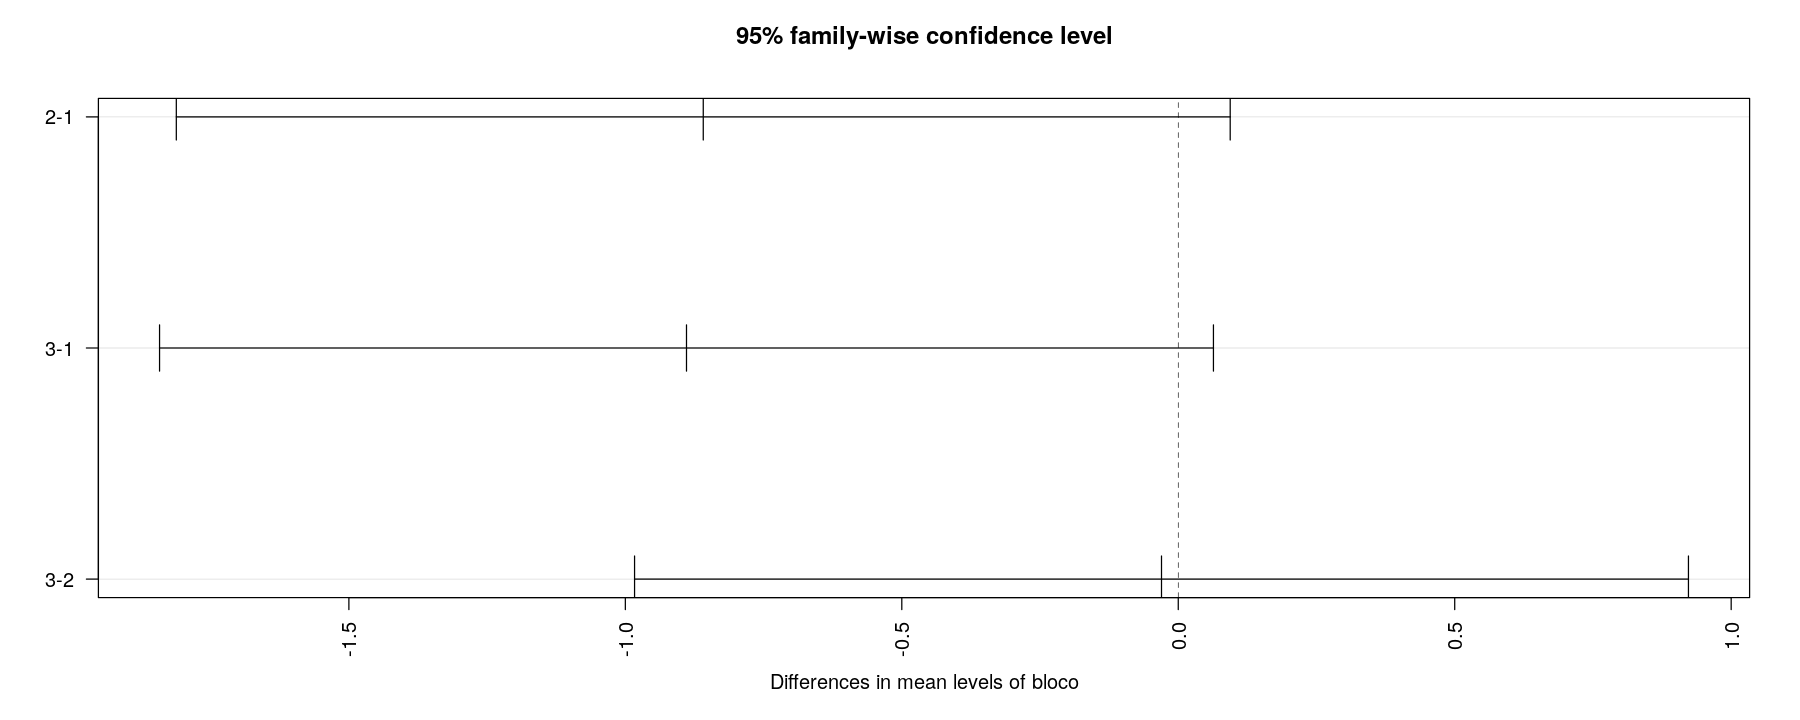

In [19]:
plot(TukeyHSD(model_alternada, conf.level=.95), las = 2)

#### Completa

In [20]:
df_completa <- df_slopes %>% filter(colheita == "completa") %>% select(c(tratamento, bloco, slope))

df_completa$tratamento <- factor(df_completa$tratamento)
df_completa$bloco <- factor(df_completa$bloco)

In [21]:
model_completa <- aov(slope ~ tratamento + bloco, data = df_completa)
summary(model_completa)

            Df Sum Sq Mean Sq F value Pr(>F)
tratamento   5 0.5545  0.1109   0.438  0.812
bloco        2 0.9351  0.4675   1.847  0.208
Residuals   10 2.5318  0.2532               